<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek43.do.txt  -->
<!-- dom:TITLE: Exercises week 43  -->

# Exercises week 43 
**October 20-24, 2025**

Date: **Deadline Friday October 24 at midnight**

# Overarching aims of the exercises for week 43

The aim of the exercises this week is to gain some confidence with
ways to visualize the results of a classification problem.  We will
target three ways of setting up the analysis. The first and simplest
one is the
1. so-called confusion matrix. The next one is the so-called

2. ROC curve. Finally we have the

3. Cumulative gain curve.

We will use Logistic Regression as method for the classification in
this exercise. You can compare these results with those obtained with
your neural network code from project 2 without a hidden layer.

In these exercises we will use binary and  multi-class data sets
(the Iris data set from week 41).

The underlying mathematics is described here.

### Confusion Matrix

A **confusion matrix** summarizes a classifier’s performance by
tabulating predictions versus true labels.  For binary classification,
it is a $2\times2$ table whose entries are counts of outcomes:

$$
\begin{array}{l|cc} & \text{Predicted Positive} & \text{Predicted Negative} \\ \hline \text{Actual Positive} & TP & FN \\ \text{Actual Negative} & FP & TN \end{array}.
$$

Here TP (true positives) is the number of cases correctly predicted as
positive, FP (false positives) is the number incorrectly predicted as
positive, TN (true negatives) is correctly predicted negative, and FN
(false negatives) is incorrectly predicted negative .  In other words,
“positive” means class 1 and “negative” means class 0; for example, TP
occurs when the prediction and actual are both positive.  Formally:

$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}, \quad \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}},
$$

where TPR and FPR are the true and false positive rates defined below.

In multiclass classification with $K$ classes, the confusion matrix
generalizes to a $K\times K$ table.  Entry $N_{ij}$ in the table is
the count of instances whose true class is $i$ and whose predicted
class is $j$.  For example, a three-class confusion matrix can be written
as:

$$
\begin{array}{c|ccc} & \text{Pred Class 1} & \text{Pred Class 2} & \text{Pred Class 3} \\ \hline \text{Act Class 1} & N_{11} & N_{12} & N_{13} \\ \text{Act Class 2} & N_{21} & N_{22} & N_{23} \\ \text{Act Class 3} & N_{31} & N_{32} & N_{33} \end{array}.
$$

Here the diagonal entries $N_{ii}$ are the true positives for each
class, and off-diagonal entries are misclassifications.  This matrix
allows computation of per-class metrics: e.g. for class $i$,
$\mathrm{TP}_i=N_{ii}$, $\mathrm{FN}_i=\sum_{j\neq i}N_{ij}$,
$\mathrm{FP}_i=\sum_{j\neq i}N_{ji}$, and $\mathrm{TN}_i$ is the sum of
all remaining entries.

As defined above, TPR and FPR come from the binary case. In binary
terms with $P$ actual positives and $N$ actual negatives, one has

$$
\text{TPR} = \frac{TP}{P} = \frac{TP}{TP+FN}, \quad \text{FPR} =
\frac{FP}{N} = \frac{FP}{FP+TN},
$$

as used in standard confusion-matrix
formulations. These rates will be used in constructing ROC curves.

### ROC Curve

The Receiver Operating Characteristic (ROC) curve plots the trade-off
between true positives and false positives as a discrimination
threshold varies.  Specifically, for a binary classifier that outputs
a score or probability, one varies the threshold $t$ for declaring
**positive**, and computes at each $t$ the true positive rate
$\mathrm{TPR}(t)$ and false positive rate $\mathrm{FPR}(t)$ using the
confusion matrix at that threshold.  The ROC curve is then the graph
of TPR versus FPR.  By definition,

$$
\mathrm{TPR} = \frac{TP}{TP+FN}, \qquad \mathrm{FPR} = \frac{FP}{FP+TN},
$$

where $TP,FP,TN,FN$ are counts determined by threshold $t$.  A perfect
classifier would reach the point (FPR=0, TPR=1) at some threshold.

Formally, the ROC curve is obtained by plotting
$(\mathrm{FPR}(t),\mathrm{TPR}(t))$ for all $t\in[0,1]$ (or as $t$
sweeps through the sorted scores).  The Area Under the ROC Curve (AUC)
quantifies the average performance over all thresholds.  It can be
interpreted probabilistically: $\mathrm{AUC} =
\Pr\bigl(s(X^+)>s(X^-)\bigr)$, the probability that a random positive
instance $X^+$ receives a higher score $s$ than a random negative
instance $X^-$ .  Equivalently, the AUC is the integral under the ROC
curve:

$$
\mathrm{AUC} \;=\; \int_{0}^{1} \mathrm{TPR}(f)\,df,
$$

where $f$ ranges over FPR (or fraction of negatives).  A model that guesses at random yields a diagonal ROC (AUC=0.5), whereas a perfect model yields AUC=1.0.

### Cumulative Gain

The cumulative gain curve (or gains chart) evaluates how many
positives are captured as one targets an increasing fraction of the
population, sorted by model confidence.  To construct it, sort all
instances by decreasing predicted probability of the positive class.
Then, for the top $\alpha$ fraction of instances, compute the fraction
of all actual positives that fall in this subset.  In formula form, if
$P$ is the total number of positive instances and $P(\alpha)$ is the
number of positives among the top $\alpha$ of the data, the cumulative
gain at level $\alpha$ is

$$
\mathrm{Gain}(\alpha) \;=\; \frac{P(\alpha)}{P}.
$$

For example, cutting off at the top 10% of predictions yields a gain
equal to (positives in top 10%) divided by (total positives) .
Plotting $\mathrm{Gain}(\alpha)$ versus $\alpha$ (often in percent)
gives the gain curve.  The baseline (random) curve is the diagonal
$\mathrm{Gain}(\alpha)=\alpha$, while an ideal model has a steep climb
toward 1.

A related measure is the {\em lift}, often called the gain ratio.  It is the ratio of the model’s capture rate to that of random selection.  Equivalently,

$$
\mathrm{Lift}(\alpha) \;=\; \frac{\mathrm{Gain}(\alpha)}{\alpha}.
$$

A lift $>1$ indicates better-than-random targeting.  In practice, gain
and lift charts (used e.g.\ in marketing or imbalanced classification)
show how many positives can be “gained” by focusing on a fraction of
the population .

### Other measures: Precision, Recall, and the F$_1$ Measure

Precision and recall (sensitivity) quantify binary classification
accuracy in terms of positive predictions.  They are defined from the
confusion matrix as:

$$
\text{Precision} = \frac{TP}{TP + FP}, \qquad \text{Recall} = \frac{TP}{TP + FN}.
$$

Precision is the fraction of predicted positives that are correct, and
recall is the fraction of actual positives that are correctly
identified .  A high-precision classifier makes few false-positive
errors, while a high-recall classifier makes few false-negative
errors.

The F$_1$ score (balanced F-measure) combines precision and recall into a single metric via their harmonic mean.  The usual formula is:

$$
F_1 =2\frac{\text{Precision}\times\text{Recall}}{\text{Precision} + \text{Recall}}.
$$

This can be shown to equal

$$
\frac{2\,TP}{2\,TP + FP + FN}.
$$

The F$_1$ score ranges from 0 (worst) to 1 (best), and balances the
trade-off between precision and recall.

For multi-class classification, one computes per-class
precision/recall/F$_1$ (treating each class as “positive” in a
one-vs-rest manner) and then averages.  Common averaging methods are:

Micro-averaging: Sum all true positives, false positives, and false negatives across classes, then compute precision/recall/F$_1$ from these totals.
Macro-averaging: Compute the F$1$ score $F{1,i}$ for each class $i$ separately, then take the unweighted mean: $F_{1,\mathrm{macro}} = \frac{1}{K}\sum_{i=1}^K F_{1,i}$ .  This treats all classes equally regardless of size.
Weighted-averaging: Like macro-average, but weight each class’s $F_{1,i}$ by its support $n_i$ (true count): $F_{1,\mathrm{weighted}} = \frac{1}{N}\sum_{i=1}^K n_i F_{1,i}$, where $N=\sum_i n_i$.  This accounts for class imbalance by giving more weight to larger classes .

Each of these averages has different use-cases. Micro-average is
dominated by common classes, macro-average highlights performance on
rare classes, and weighted-average is a compromise.  These formulas
and concepts allow rigorous evaluation of classifier performance in
both binary and multi-class settings.

## Exercises

Here is a simple code example which uses  the Logistic regression machinery from **scikit-learn**.
At the end it sets up the confusion matrix and the ROC and cumulative gain curves.
Feel free to use these functionalities (we don't expect you to write your own code for say the confusion matrix).

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
# from sklearn.datasets import fill in the data set
from sklearn.linear_model import LogisticRegression

### Exercise a)

Convince yourself about the mathematics for the confusion matrix, the ROC and the cumlative gain curves for both a binary and a multiclass classification problem.

### Exercise b)

Use a binary classification data available from **scikit-learn**. As an example you can use
the MNIST data set and just specialize to two numbers. To do so you can use the following code lines

(270, 64)
(90, 64)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test set accuracy with Logistic Regression: 1.00


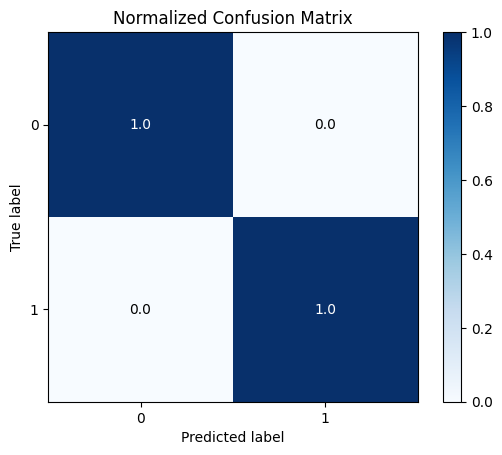

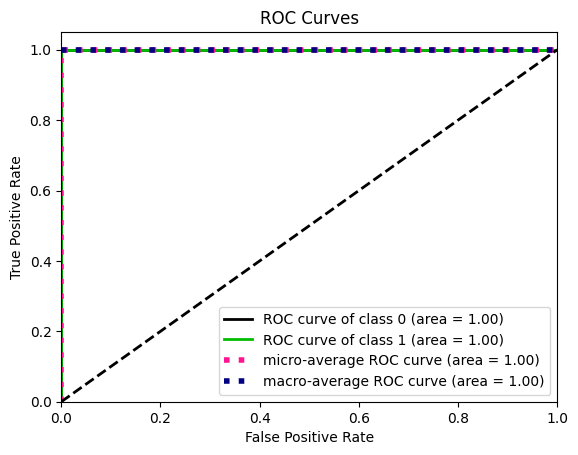

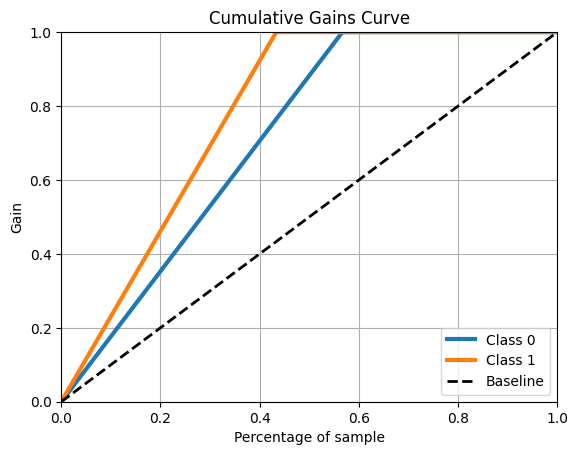

In [2]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=2) # Load only two classes, e.g., 0 and 1
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(X_test.shape)
# Logistic Regression
# define which type of problem, binary or multiclass
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
#Cross validation
accuracy = cross_validate(logreg,X_test,y_test,cv=10)['test_score']
print(accuracy)
print("Test set accuracy with Logistic Regression: {:.2f}".format(logreg.score(X_test,y_test)))

import scikitplot as skplt
y_pred = logreg.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
y_probas = logreg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

Alternatively, you can use the _make$\_$classification_
functionality. This function generates a random $n$-class classification
dataset, which can be configured for binary classification by setting
n_classes=2. You can also control the number of samples, features,
informative features, redundant features, and more.

(750, 20)
(250, 20)
[0.64 0.92 0.96 0.8  0.88 0.88 0.88 0.92 0.84 0.68]
Test set accuracy with Logistic Regression: 0.86


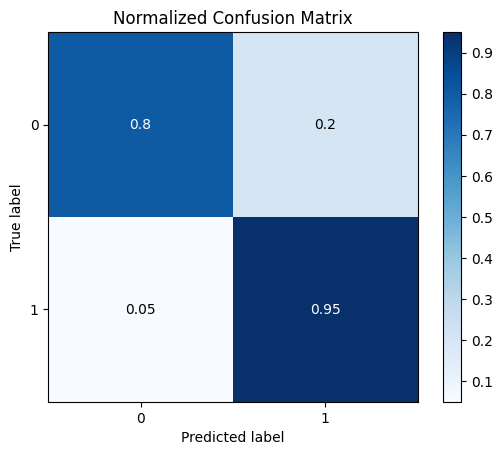

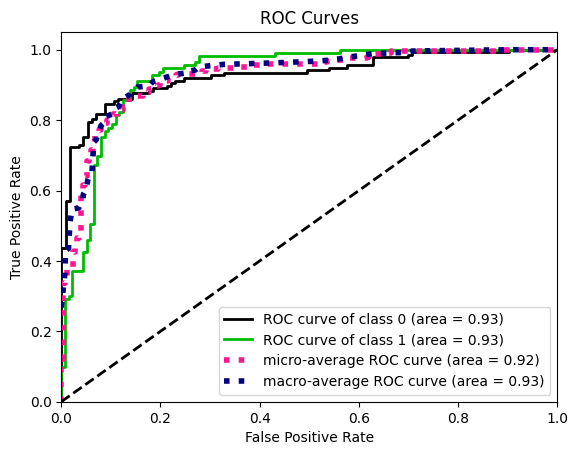

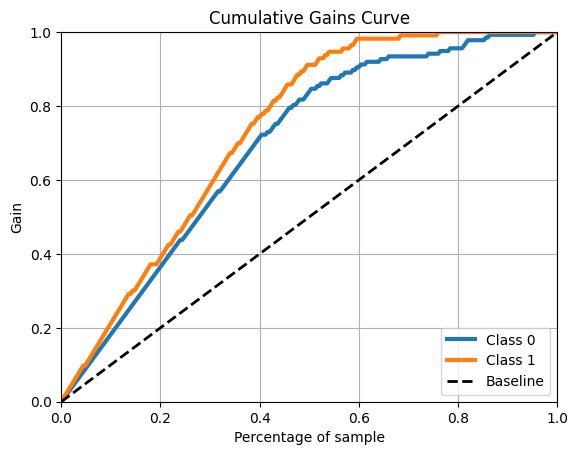

In [3]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(X_test.shape)
# Logistic Regression
# define which type of problem, binary or multiclass
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
#Cross validation
accuracy = cross_validate(logreg,X_test,y_test,cv=10)['test_score']
print(accuracy)
print("Test set accuracy with Logistic Regression: {:.2f}".format(logreg.score(X_test,y_test)))

import scikitplot as skplt
y_pred = logreg.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
y_probas = logreg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

You can use this option for the multiclass case as well, see the next exercise.
If you prefer to study other binary classification datasets, feel free
to replace the above suggestions with your own dataset.

Make plots of the confusion matrix, the ROC curve and the cumulative gain curve.

### Exercise c) week 43

As a multiclass problem, we will use the Iris data set discussed in
the exercises from weeks 41 and 42. This is a three-class data set and
you can set it up using **scikit-learn**,

(112, 4)
(38, 4)
[1.   1.   1.   0.75 1.   0.75 1.   0.75 1.   1.  ]
Test set accuracy with Logistic Regression: 0.97


/home/manuela/miniconda3/envs/fys-course/lib/python3.10/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


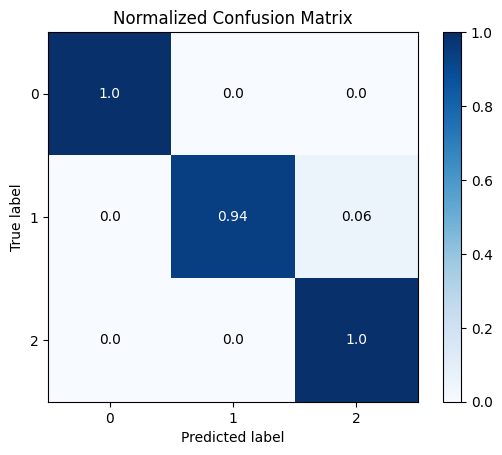

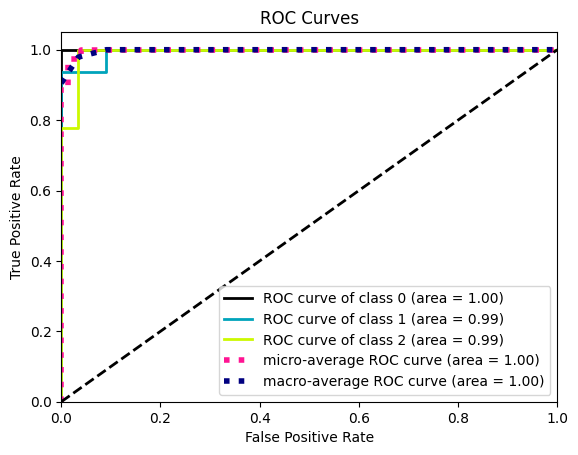

<Figure size 640x480 with 0 Axes>

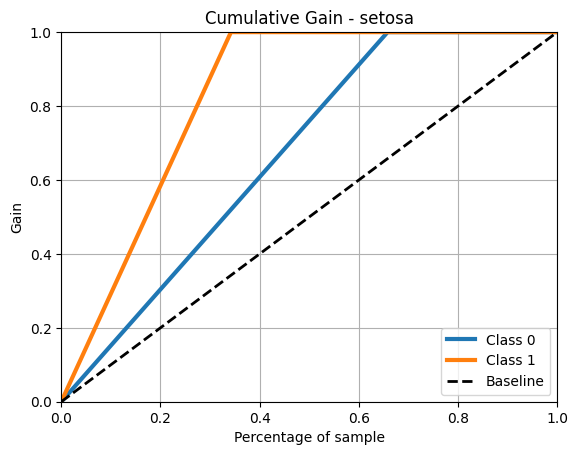

<Figure size 640x480 with 0 Axes>

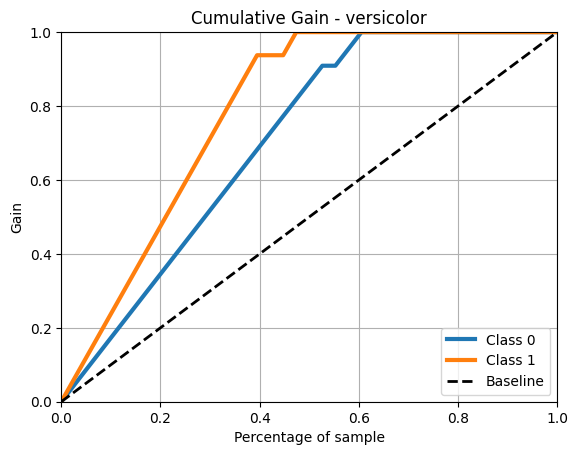

<Figure size 640x480 with 0 Axes>

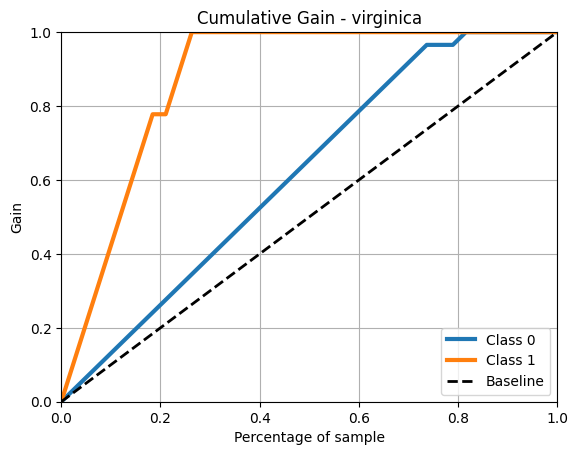

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
y = iris.target # Target labels

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(X_test.shape)
# Logistic Regression
# define which type of problem, binary or multiclass
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
#Cross validation
accuracy = cross_validate(logreg,X_test,y_test,cv=10)['test_score']
print(accuracy)
print("Test set accuracy with Logistic Regression: {:.2f}".format(logreg.score(X_test,y_test)))

import scikitplot as skplt
from sklearn.preprocessing import label_binarize
y_pred = logreg.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
y_probas = logreg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

# Binarize true labels for one-vs-rest evaluation
y_test_bin = label_binarize(y_test, classes=np.arange(len(iris.target_names)))

for i, class_name in enumerate(iris.target_names):
    # Create binary probability array for this class: [prob_not_class, prob_class]
    probs_binary = np.vstack([1 - y_probas[:, i], y_probas[:, i]]).T
    plt.figure()
    skplt.metrics.plot_cumulative_gain(y_test_bin[:, i], probs_binary)
    plt.title(f'Cumulative Gain - {class_name}')
    plt.show()

Make plots of the confusion matrix, the ROC curve and the cumulative
gain curve for this (or other) multiclass data set.